<a href="https://colab.research.google.com/github/gabrieleite/P_Integrador_2022/blob/main/Projeto_Integrador_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as static
import scipy.stats as st
%matplotlib inline

from collections import Counter


**Pandas** 

A biblioteca Pandas é uma biblioteca Python para análise de dados. O Pandas vem com um conjunto de opções e configurações alteráveis ​​pelo usuário. A biblioteca oferece várias maneiras de remodelar e reestruturar os DataFrames. Esses métodos variam de simples e fáceis até poderosos e complexos. (**VOITTO**, 2022)

O pandas permite trabalhar com diferentes tipos de dados, por exemplo: dados tabulares, como uma planilha Excel ou uma tabela SQL; dados ordenados de modo temporal ou não; matrizes; qualquer outro conjunto de dados, que não necessariamente precisem estar rotulados; (**Harve**, 2022)

**Matplotlib**

Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python. O Matplotlib torna as coisas mais fáceis e as difíceis possíveis. (**Matplotlib**, 2022)

**Seaborn**

Seaborn é uma biblioteca que usa o Matplotlib para plotar gráficos. Ele será usado para visualizar distribuições aleatórias. (**W3schools**, 2022)

**Numpy**

O pacote NumPy é uma biblioteca de código aberto destinada a realizar operações em arrays multidimensionais, amigavelmente denominada como ndarray nesta biblioteca. A biblioteca oferece operações rápidas para tratamento e limpeza de dados, geração de subconjuntos e filtragens, estatísticas descritivas, manipulação de dados relacionais, manipulações de dados em grupos, entre outros tipos de processamento.(**Harve**, 2022)

**Statistics/static**

Este módulo fornece funções para calcular estatísticas matemáticas de dados numéricos (valores reais).
Destina-se ao nível das calculadoras gráficas e científicas. (**Python Docs**, 2022)

**Scipy**

O projeto SciPy é uma coleção de bibliotecas Python open-source para matemática, ciência e engenharia, incluindo o NumPy e o matplotlib. Ela contém como submódulos a maioria das ferramentas que se espera de um software para cientistas, incluindo funções especiais, integração, otimização, interpolação, transformadas de Fourier, processamento de sinais, álgebra linear, estatística e processamento de imagens. (**Gepac**, 2022)

**Collections Counter**

O módulo Collections implementa tipos de dados de container de alto desempenho (além da lista de tipos internos, dict e tuple) e contém muitas estruturas de dados úteis para usar para armazenar informações na memória. 

Um Counter é um container que rastreia quantas vezes os valores equivalentes são adicionados. (**Python For Beginners**, 2022)

# Adicionando os dados nos gráficos de barras horizontais

In [4]:
def emcima(rects, ax):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height), 
                xytext = (0, 3),
                textcoords="offset points",
                ha = 'center', va='bottom')

#Importando os Dados 

In [5]:
#Importação dos dados
dados = pd.read_csv('/content/ocorrencias_cenipa.csv')

# Visualizando o conjunto de dados

In [ ]:
dados.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


#Dados por Região

In [ ]:
regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
           'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
           'Centro Oeste': ['MT', 'MS', 'GO'],
           'Sudeste': ['SP', 'RJ', 'ES', 'MG'], 
           'Sul': ['PR', 'RS', 'SC']}

tipos = ['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE']

um = {i: [len([k for k in list(dados.loc[dados['tipo'] == i, ['estado']]['estado'])
              if k in regioes[j]]) for j in regioes.keys()] for i in tipos}

um['Região'] = list(regioes.keys())
dados_por_regiao = pd.DataFrame(um)

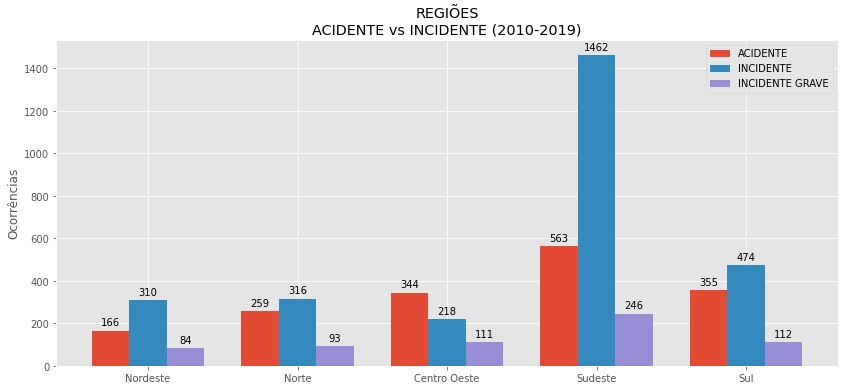

In [ ]:
#Visualizando os dados no gráfico
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (14, 6))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1 ]
r3 = [ x + width for x in r2 ]

rects1 = ax.bar(r1, dados_por_regiao['ACIDENTE'], width, label = 'ACIDENTE')
rects2 = ax.bar(r2, dados_por_regiao['INCIDENTE'], width, label = 'INCIDENTE')
rects3 = ax.bar(r3, dados_por_regiao['INCIDENTE GRAVE'], width, label = 'INCIDENTE GRAVE')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE (2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_por_regiao['Região'])
ax.legend()

emcima(rects1, ax)
emcima(rects2, ax)
emcima(rects3, ax)

plt.show()

Após análise dos dados obtidos pelo gráfico, é possível notar que a região que possui maior incidência de todos os três tipos de tipos de acidentes é a região **Sudeste**.

Ainda analisando a regiçai **Sudeste**, podemos ver que dos três tipos de acidentes, o incidente o obtêm a porcentagem de aproximadamente 64%. 

A região que possui menos ocorrências é a **Nordeste**, com, ao todo, 560 ocorrências, sendo a maior incidência delas em **Incidentes** (~55%).

# Percentual por Tipos de Acidentes

In [11]:
cores_tipo = ['#87CEFA','#FF69B4', '#FFD700']
cores_ano = ['#87CEFA','#FF69B4', '#FFD700', "#9b59b6", "#e74c3c", '#8B0000', '#C0C0C0']
cor1 = ['#87CEFA']
cor2 = ['#FF69B4', '#8B0000' ]

In [ ]:
tipo = dados['tipo'].value_counts()
tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE']
acidente = tipo['ACIDENTE']
incidente = tipo['INCIDENTE']
incidente_grave = tipo['INCIDENTE GRAVE']

In [ ]:
porc_acidente = tipo['ACIDENTE']/(tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE'])*100
porc_incidente = tipo['INCIDENTE']/(tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE'])*100
porc_incidente_grave = tipo['INCIDENTE GRAVE']/(tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE'])*100
print('Acidente: {} ({:.2f}%)'.format(acidente,porc_acidente))
print('Incidente: {} ({:.2f}%)'.format(incidente,porc_incidente))
print('Incidente Grave: {} ({:.2f}%)'.format(incidente_grave,porc_incidente_grave))

Acidente: 1694 (32.32%)
Incidente: 2887 (55.07%)
Incidente Grave: 661 (12.61%)


Text(6, 2, 'Desvio Padrão: 909.54')

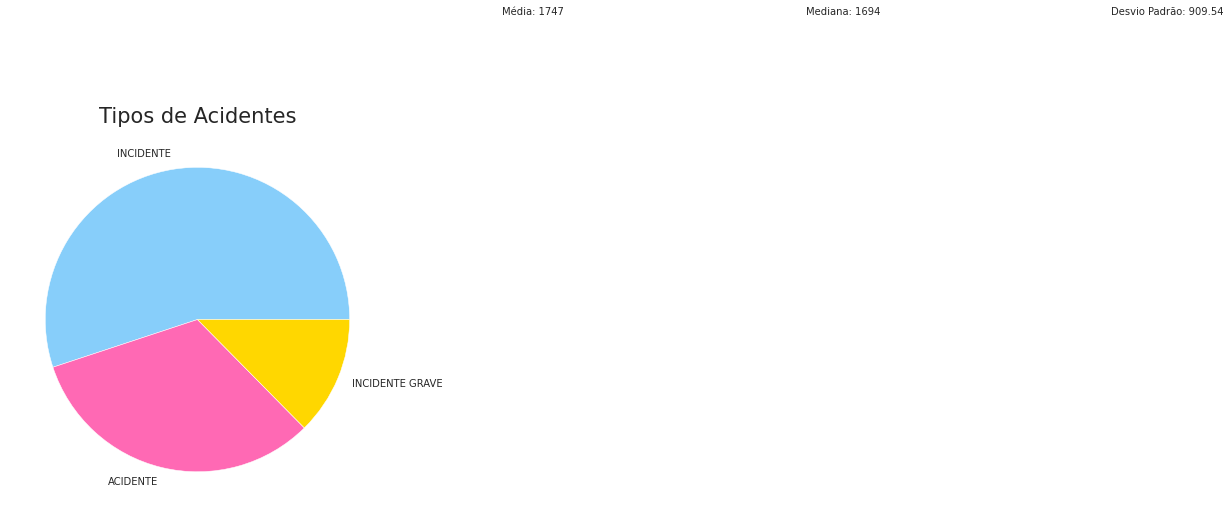

In [169]:
fig = plt.figure(figsize=(7,7))
sns.set_style('ticks')
tipo = dados['tipo'].value_counts()
tipo_num = [tipo[0],tipo[1], tipo[2]]
plt.pie(tipo_num, labels=['INCIDENTE','ACIDENTE', 'INCIDENTE GRAVE'],colors=cores_tipo)
plt.title('Tipos de Acidentes',fontsize=21);

plt.text(2, 2, 'Média: %d'%(static.mean(dados['tipo'].value_counts())))
plt.text(4, 2, 'Mediana: %d'%(static.median(dados['tipo'].value_counts())))
plt.text(6, 2, 'Desvio Padrão: %.2f'%(static.pstdev(dados['tipo'].value_counts())))

Ao observar o gráfico podemos notar que **Incidentes** possuem um percentual mais alto, com aproximadamente 56%. 

O mais baixo em quesito percentuals são os **Incidentes Graves** com 12%. 

E entre eles, ficam os **Acidentes** com 32%.


# Por Ano de Ocorrência

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(10, 600.8, 'Desvio Padrão: 83.67')

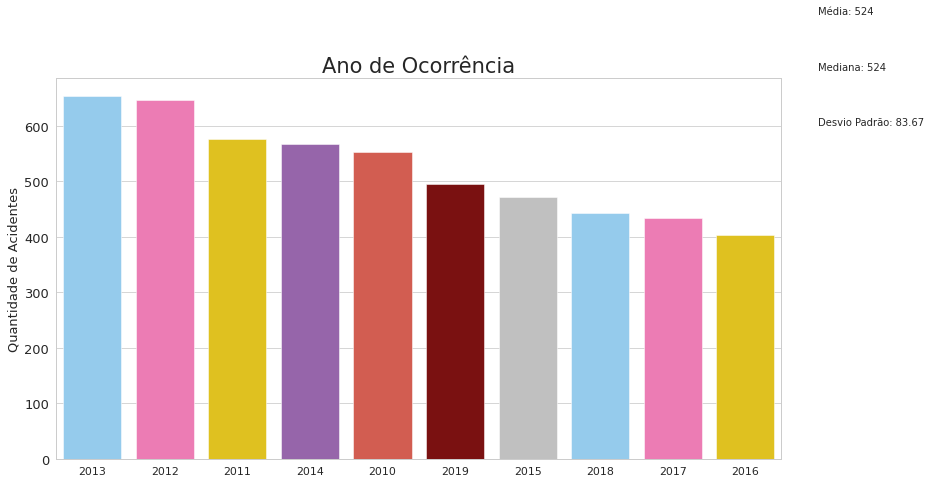

In [173]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(13,7))
sns.countplot('ano',order = dados['ano'].value_counts().index,palette=cores_ano,data=dados)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Ano de Ocorrência',fontsize=21)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.ylabel('Quantidade de Acidentes',fontsize=13)
fig.savefig('ano_ocorrencia.png');

plt.text(10, 800.6, 'Média: %d'%(static.mean(dados['ano'].value_counts())))
plt.text(10, 700.3, 'Mediana: %d'%(static.median(dados['ano'].value_counts())))
plt.text(10, 600.8, 'Desvio Padrão: %.2f'%(static.pstdev(dados['ano'].value_counts())))

Analisando o gráfico acima, podemos obter a informação de quem o ano que mais ocorreram acidentes foi o de **2013**. 

Havendo uma crescente se formos analisar o ano que **2010** que obteve um número abaixo de 500, após 2010, nos anos **2011**, **2012** e **2013** obtivemos um número maior de acidentes. 

Após esses anos, em **2014 até 2016** obtivemos uma diminuição de ocorrências. Porém após **2016**, o número cresceu.



#Ocorrência por Estado

In [ ]:
#Porcentagem
dados['estado'].value_counts()/dados['estado'].value_counts().sum()*100

SP    23.636017
MG     9.194964
RJ     9.156810
PR     8.412820
RS     6.371614
GO     5.455933
PA     5.017169
MT     4.864556
AM     4.139641
BA     3.815338
SC     3.166730
MS     2.518123
DF     2.460893
PE     1.716902
CE     1.487982
ES     1.335368
MA     1.297215
AC     1.030141
RR     0.934758
TO     0.877528
PI     0.686761
AL     0.572301
RO     0.572301
PB     0.438764
SE     0.400610
RN     0.267074
AP     0.171690
Name: estado, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(15, 900.8, 'Desvio Padrão: 249.91')

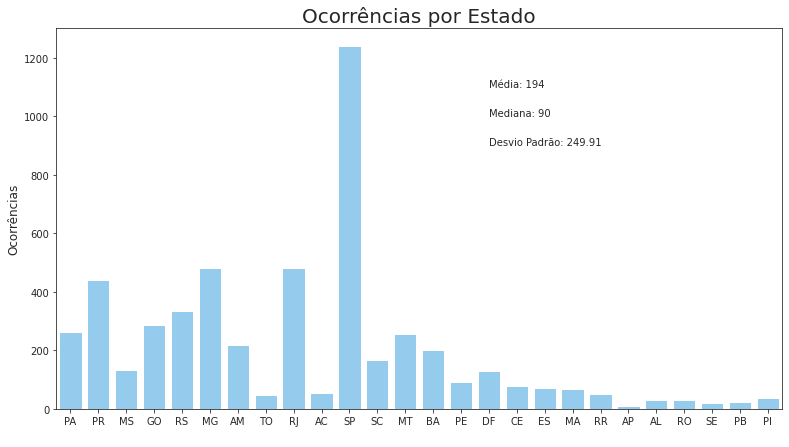

In [ ]:
fig1 = plt.figure(figsize=(13,7))
y = dados['estado'].count()
sns.countplot('estado', palette=cor1, data=dados)
plt.xlim(-0.5,25.5)
plt.title('Ocorrências por Estado', fontsize=20)
plt.xlabel(' ')
plt.ylabel('Ocorrências', fontsize=12)

plt.text(15, 1100.6, 'Média: %d'%(static.mean(dados['estado'].value_counts())))
plt.text(15, 1000.3, 'Mediana: %d'%(static.median(dados['estado'].value_counts())))
plt.text(15, 900.8, 'Desvio Padrão: %.2f'%(static.pstdev(dados['estado'].value_counts())))


Analisando o gráfico acima, podemos obter as seguintes informações:



*   O estado com maiores ocorrências é o estado de **São Paulo**, com ~24%, com uma distância grande do segundo lugar, o estado de **Minas Gerais** (9%). 
*   O estado com menores ocorrências é o estado do **Amapá**, com menos de 1% de ocorrências. 
*   Acompanhando o estado do Amapá, os estados de **Roraima**, **Tocantins**, **Piauí**, **Alagoas**, **Rondônia**, **Paraíba**, **Sergipe**, **Rio Grande do Norte** também estão abaixo de 1%. 




# Status da Investigação

In [ ]:
status = dados['status_investigacao'].value_counts()
status['FINALIZADA'] + status['ATIVA'] + status['INDETERMINADA']
finalizada = status['FINALIZADA']
ativa = status['ATIVA']
indeterminada = status['INDETERMINADA']

In [ ]:
p_finalizada = status['FINALIZADA']/(status['FINALIZADA'] + status['ATIVA'] + status['INDETERMINADA'])*100
p_ativa = status['ATIVA']/(status['FINALIZADA'] + status['ATIVA'] + status['INDETERMINADA'])*100
p_indeterminada = status['INDETERMINADA']/(status['FINALIZADA'] + status['ATIVA'] + status['INDETERMINADA'])*100

print('FINALIZADA: {} ({:.2F}%)'.format(finalizada, p_finalizada))
print('ATIVA: {} ({:.2F}%)'.format(ativa, p_ativa))
print('INDETERMINADA: {} ({:.2F}%)'.format(indeterminada, p_indeterminada))


FINALIZADA: 4066 (77.57%)
ATIVA: 816 (15.57%)
INDETERMINADA: 360 (6.87%)


Text(4, 2, 'Desvio Padrão: 1650.08')

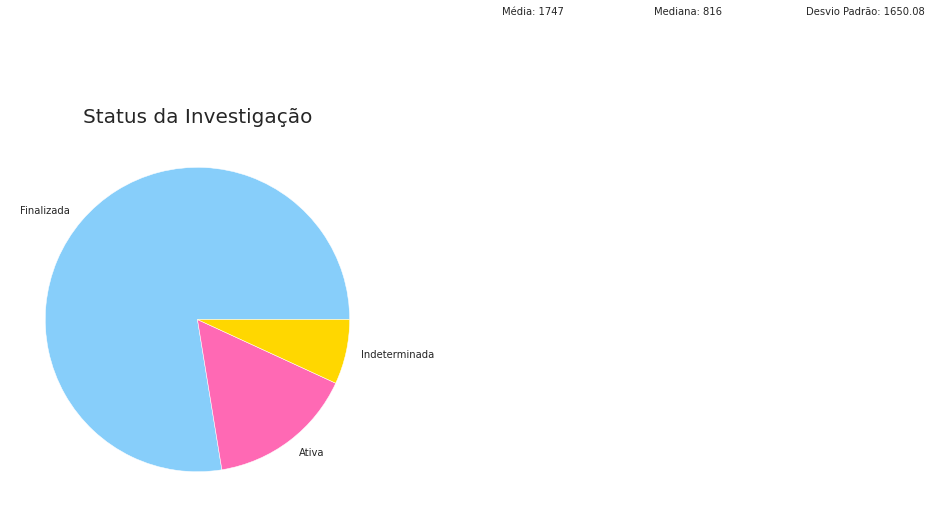

In [176]:

fig = plt.figure(figsize=(7,7))
sns.set_style('ticks')
status = dados['status_investigacao'].value_counts()
status_num = [status[0], status[1], status[2]]
plt.pie(status_num, labels=['Finalizada', 'Ativa', 'Indeterminada'], colors=cores_ano)
plt.title('Status da Investigação', fontsize=20)

plt.text(2, 2, 'Média: %d'%(static.mean(dados['status_investigacao'].value_counts())))
plt.text(3, 2, 'Mediana: %d'%(static.median(dados['status_investigacao'].value_counts())))
plt.text(4, 2, 'Desvio Padrão: %.2f'%(static.pstdev(dados['status_investigacao'].value_counts())))

A análise dos status da investigação nos trouxe os seguintes resultados: 



*   A maior parte das investigações foram **finalizadas** (~78%).
*   Porém ainda temos 15% **ativas** e ~7% **indeterminadas**.
*   São quase 1.200 investigações que **não** foram finalizadas.


# Nível de Dano 

In [ ]:
#Porcentagem
dados['aeronave_nivel_dano'].value_counts()/dados['aeronave_nivel_dano'].value_counts().sum()*100

NENHUM           34.853110
LEVE             29.168256
SUBSTANCIAL      28.901183
DESTRUÍDA         6.276230
INDETERMINADO     0.801221
Name: aeronave_nivel_dano, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(3, 900.8, 'Desvio Padrão: 719.07')

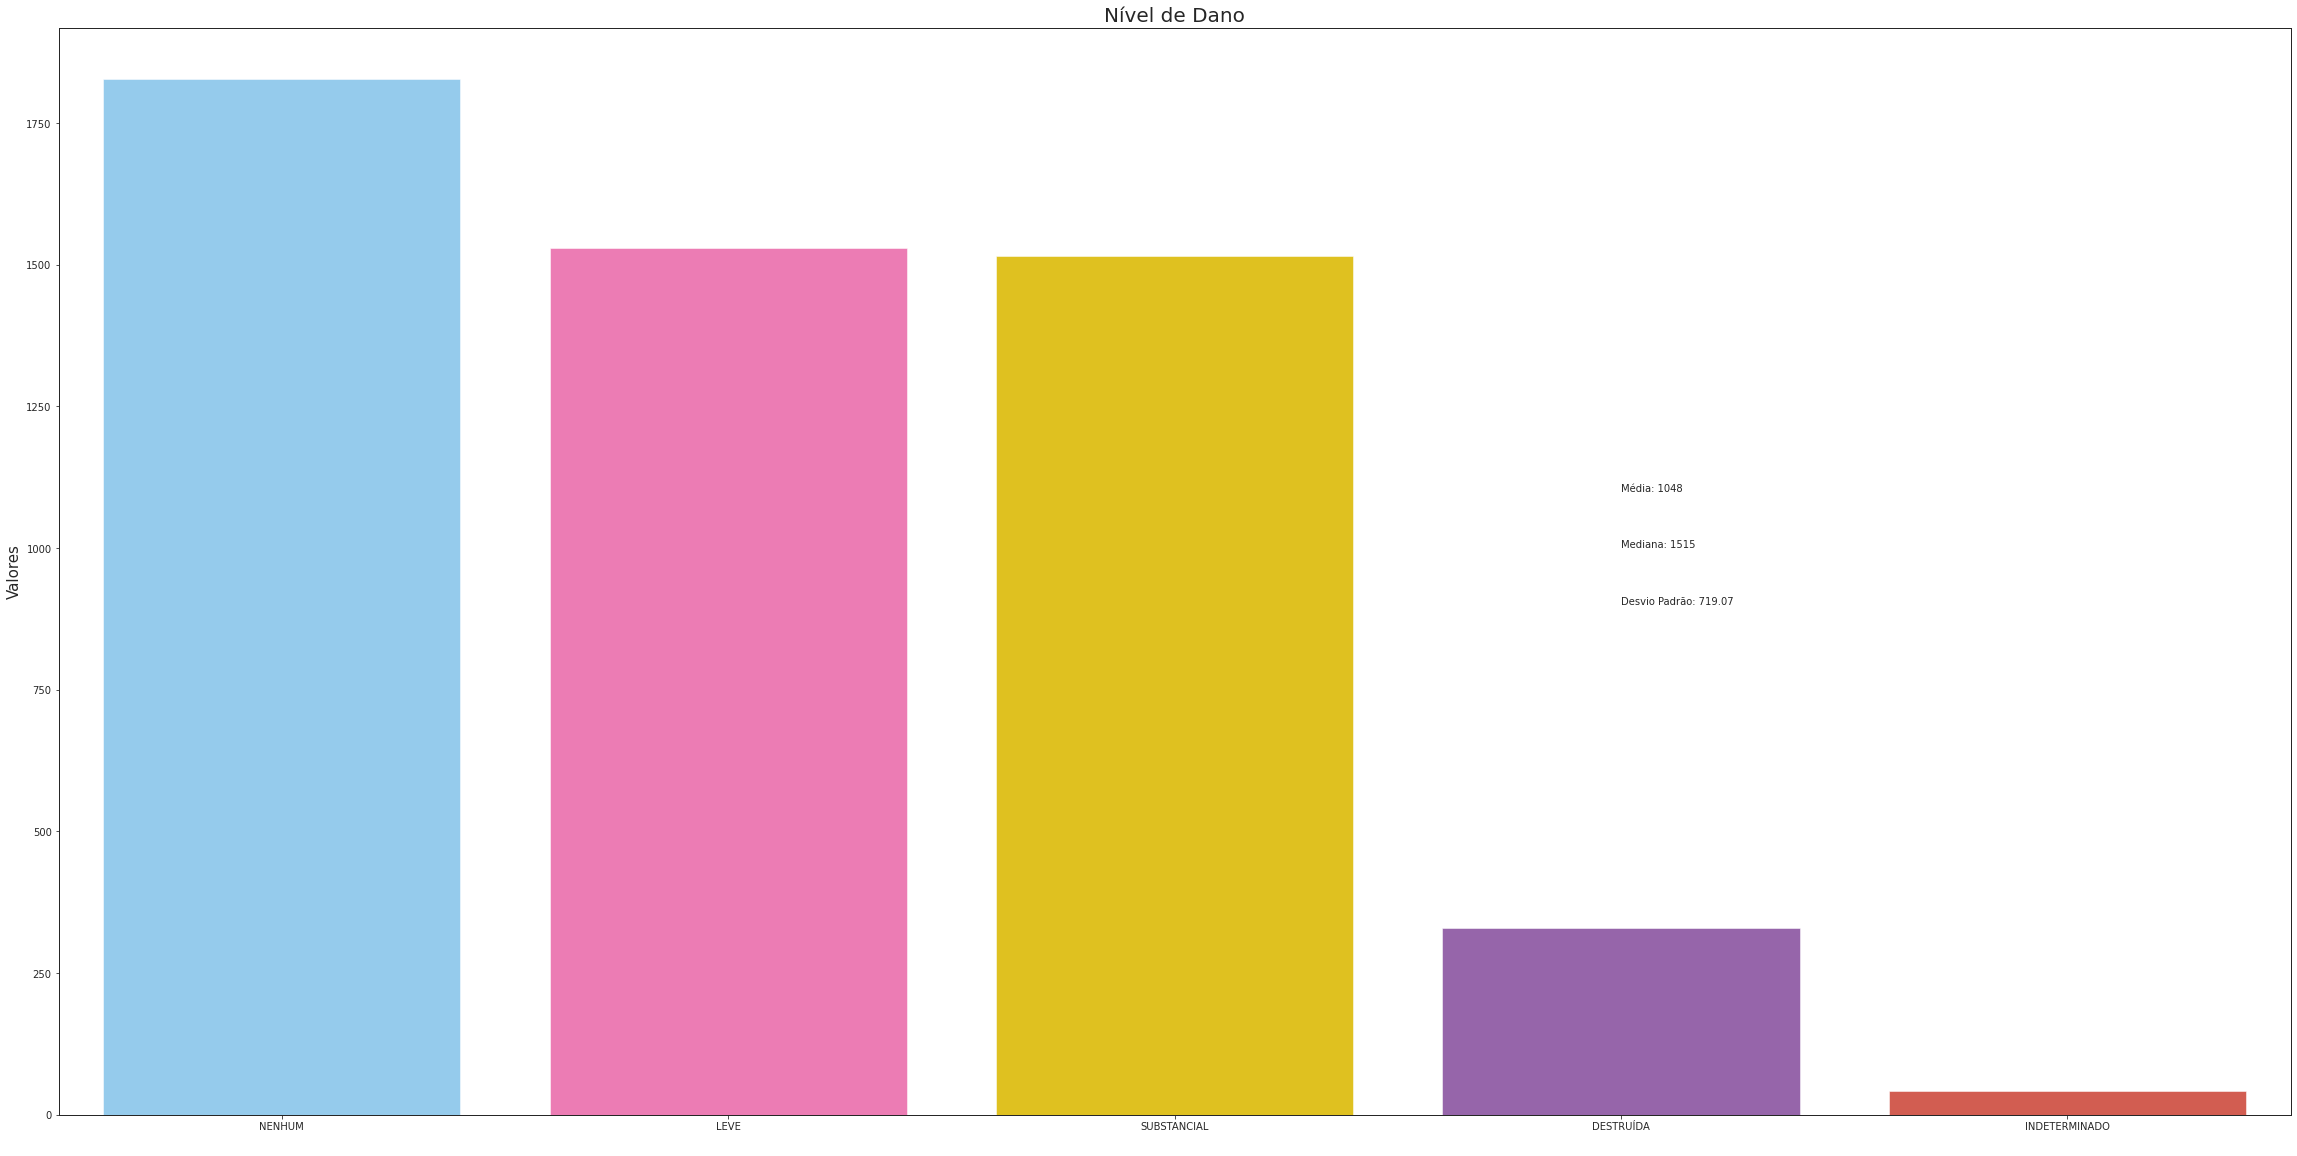

In [181]:
fig = plt.figure(figsize=(40,20))
y = dados['aeronave_nivel_dano'].count()
sns.countplot('aeronave_nivel_dano', order=['NENHUM', 'LEVE', 'SUBSTANCIAL', 'DESTRUÍDA', 'INDETERMINADO'], palette=cores_ano, data=dados)
plt.title('Nível de Dano', fontsize=20)
plt.xlabel(' ')
plt.ylabel('Valores', fontsize=15)

plt.text(3, 1100.6, 'Média: %d'%(static.mean(dados['aeronave_nivel_dano'].value_counts())))
plt.text(3, 1000.3, 'Mediana: %d'%(static.median(dados['aeronave_nivel_dano'].value_counts())))
plt.text(3, 900.8, 'Desvio Padrão: %.2f'%(static.pstdev(dados['aeronave_nivel_dano'].value_counts())))

A partir da análise do gráfico acima podemos ver que dentro das ocorrências de acidentes das aeronaves, a maioria delas nao obteve **nenhum dano** (~34%), ou foram **leves** (29%) ou **substanciais** (28%).

Porém, 6% dos casos, as aeronaves ficaram **destruídas**.

#Fase de Operação


In [184]:
fase_operacao = Counter(dados['aeronave_fase_operacao'])
fase = sorted(fase_operacao, key = fase_operacao.get, reverse = True)
contador = sorted(list(fase_operacao.values()), reverse = True)

Text(15, 24.8, 'Desvio Padrão: 252.76')

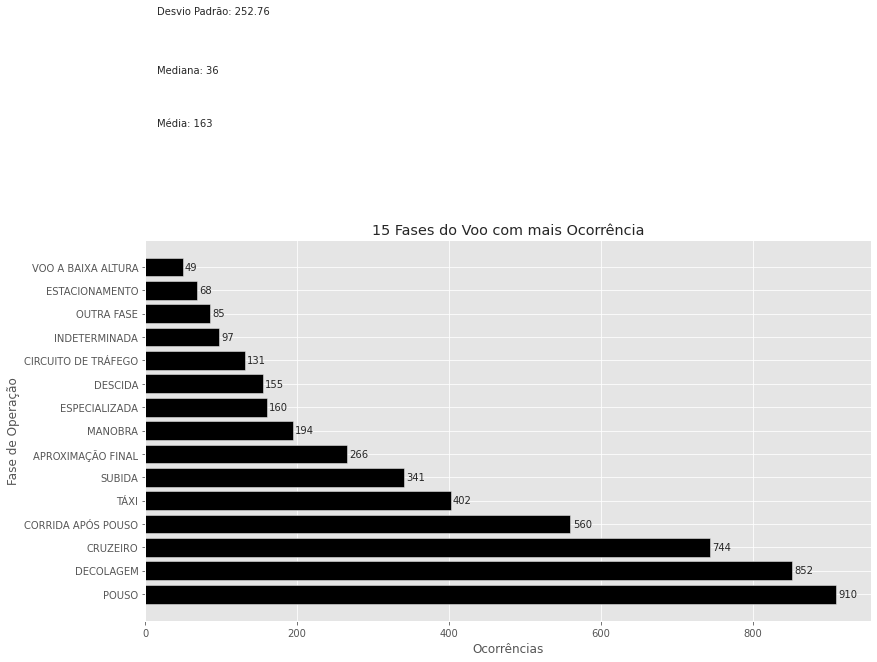

In [192]:
plt.style.use("ggplot")
fig,ax= plt.subplots(figsize=(13,7))

x = fase[:15]
y = contador[:15]

ax.barh(x, y, color='black')

for i, v in enumerate(y):
  ax.text(v + 3, i, str(v), va='center')

plt.xlabel('Ocorrências')
plt.ylabel('Fase de Operação')
plt.title('15 Fases do Voo com mais Ocorrência')

plt.text(15, 20, 'Média: %d'%(static.mean(dados['aeronave_fase_operacao'].value_counts())))
plt.text(15, 22.3, 'Mediana: %d'%(static.median(dados['aeronave_fase_operacao'].value_counts())))
plt.text(15, 24.8, 'Desvio Padrão: %.2f'%(static.pstdev(dados['aeronave_fase_operacao'].value_counts())))

Com base no gráfico podemos ver que o maior número de acidentes das aeronaves ocorreram em fase de **Pouso** (910), logo atrás vem a fase de **Decolagem**, com 852 ocorrências. 

Além dos citados acima, as fases que possuíram números de ocorrências **acima da média** foram, respectivamente, **Cruzeiro**, **Corrida Após Pouso**, **Táxi**, **Subida**, **Aproximação Final** e **Manobra**.

Das 15 fases analisadas a que obteve **menos registros** foi a de **"Voo a Baixa Altura"**, com 49 ocorrências. 



# País Fabricante

In [194]:
pais_fabricante = Counter(dados['aeronave_pais_fabricante'])
pais = sorted(pais_fabricante, key = pais_fabricante.get, reverse = True)
contador = sorted(list(pais_fabricante.values()), reverse = True)

Text(200, 12.0, 'Desvio Padrão: 1118.89')

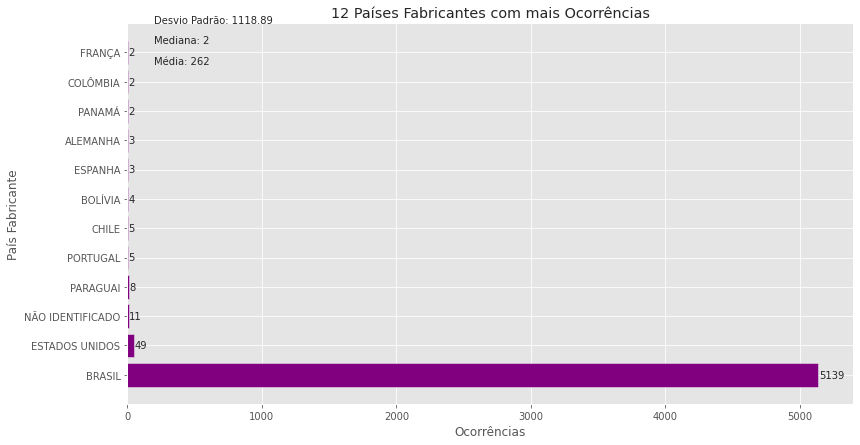

In [207]:
plt.style.use("ggplot")
fig,ax= plt.subplots(figsize=(13,7))

x = pais[:12]
y = contador[:12]

ax.barh(x, y, color='purple')

for i, v in enumerate(y):
  ax.text(v + 3, i, str(v), va='center')

plt.xlabel('Ocorrências')
plt.ylabel('País Fabricante')
plt.title('12 Países Fabricantes com mais Ocorrências')

plt.text(200, 10.6, 'Média: %d'%(static.mean(dados['aeronave_pais_fabricante'].value_counts())))
plt.text(200, 11.3, 'Mediana: %d'%(static.median(dados['aeronave_pais_fabricante'].value_counts())))
plt.text(200, 12.0, 'Desvio Padrão: %.2f'%(static.pstdev(dados['aeronave_pais_fabricante'].value_counts())))

A partir dos dados obtidos com o gráfico acima, podemos ver que o **Brasil** tem **5139** ocorrências, obtendo um distanciamento enorme do segundo país fabricante: **Estados Unidos (49)**, e estando muito **acima da média** (262). 

Dos países filtrados (12), os que possuem menos ocorrências são **França**, **Colômbia** e **Panamá**, todos com 2 ocorrências.

# Ocorrência por Mês



In [209]:
dados['data'] = pd.to_datetime(dados['data'])
dados['Mes'] = dados['data'].map(lambda x: x.month)

In [ ]:
dados['Mes'].value_counts()

1     479
3     474
9     458
4     456
7     448
2     441
5     436
10    430
12    429
8     415
11    403
6     373
Name: Mes, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(15, 900.8, 'Desvio Padrão: 28.75')

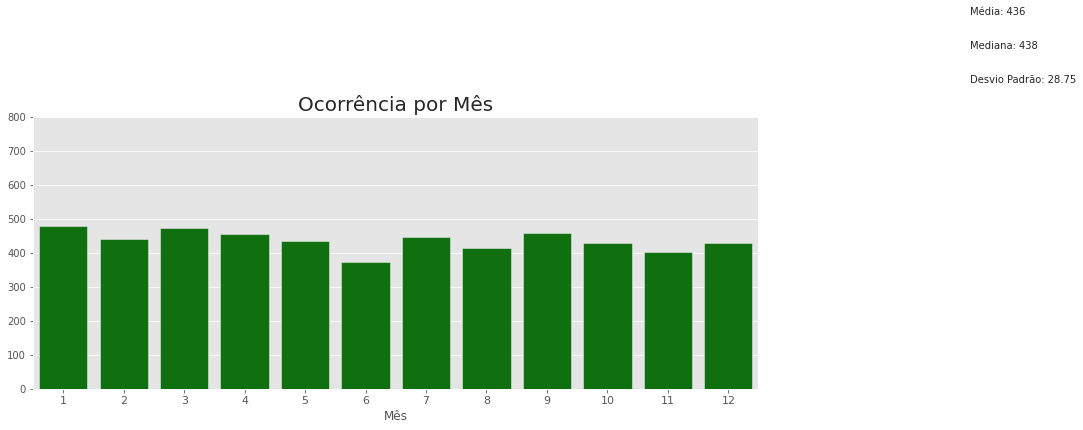

In [210]:
fig = plt.figure(figsize=(13,5))
plt.title('Ocorrência por Mês', fontsize=20)
sns.countplot('Mes', color='green', data=dados)
plt.ylim(0,800)
plt.ylabel('')
plt.xlabel('Mês', fontsize=12)
plt.xticks(fontsize=11)

plt.text(15, 1100.6, 'Média: %d'%(static.mean(dados['Mes'].value_counts())))
plt.text(15, 1000.3, 'Mediana: %d'%(static.median(dados['Mes'].value_counts())))
plt.text(15, 900.8, 'Desvio Padrão: %.2f'%(static.pstdev(dados['Mes'].value_counts())))

Nota-se que o mês com **mais** ocorrências foi o mês de **Janeiro** (1), com 479 registros. Não muito atrás está o mês de **Março** (3), com 474 ocorrências. 

O mês que possui **menos** ocorrências é o mês de **Junho** (6), com 363 registros e, também é o único mês que possui menos de 400 ocorrências.  

# Por Cidade

In [6]:
cidade = Counter(dados['cidade'])
fase_cidade = sorted(cidade, key = cidade.get, reverse = True)
contador = sorted(list(cidade.values()), reverse = True)

Text(15, 5.8, 'Desvio Padrão: 17.89')

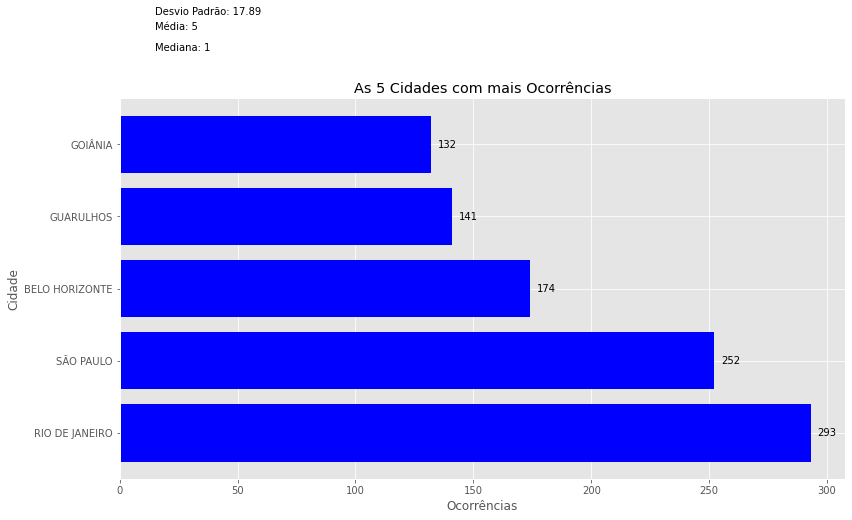

In [7]:
plt.style.use("ggplot")
fig,ax= plt.subplots(figsize=(13,7))

x = fase_cidade[:5]
y = contador[:5]

ax.barh(x, y, color='blue')

for i, v in enumerate(y):
  ax.text(v + 3, i, str(v), va='center')

plt.xlabel('Ocorrências')
plt.ylabel('Cidade')
plt.title('As 5 Cidades com mais Ocorrências')

plt.text(15, 5.6, 'Média: %d'%(static.mean(dados['cidade'].value_counts())))
plt.text(15, 5.3, 'Mediana: %d'%(static.median(dados['cidade'].value_counts())))
plt.text(15, 5.8, 'Desvio Padrão: %.2f'%(static.pstdev(dados['cidade'].value_counts())))

Podemos notar que a cidade que **mais** possui ocorrências é a cidade do **Rio de Janeiro**, com quase 300 registros. 

No gráfico foram filtradas as 5 cidades com mais ocorrências, nota-se que as 4 primeiras são da região **Sudeste**, que é a região que mais possui ocorrências. 

Em quinto, temos a cidade de **Goiânia**, na Região Centro-Oeste, com 132 registros. 

# Por Tipo de Aeronave

In [ ]:
dados['aeronave_tipo'].value_counts()/dados['aeronave_tipo'].value_counts().sum()*100

AVIÃO            80.370088
HELICÓPTERO      11.446013
ULTRALEVE         5.875620
INDETERMINADO     1.640595
PLANADOR          0.286150
ANFÍBIO           0.228920
TRIKE             0.095383
DIRIGÍVEL         0.019077
BALÃO             0.019077
HIDROAVIÃO        0.019077
Name: aeronave_tipo, dtype: float64

Text(4, 1.8, 'Desvio Padrão: 1243.55')

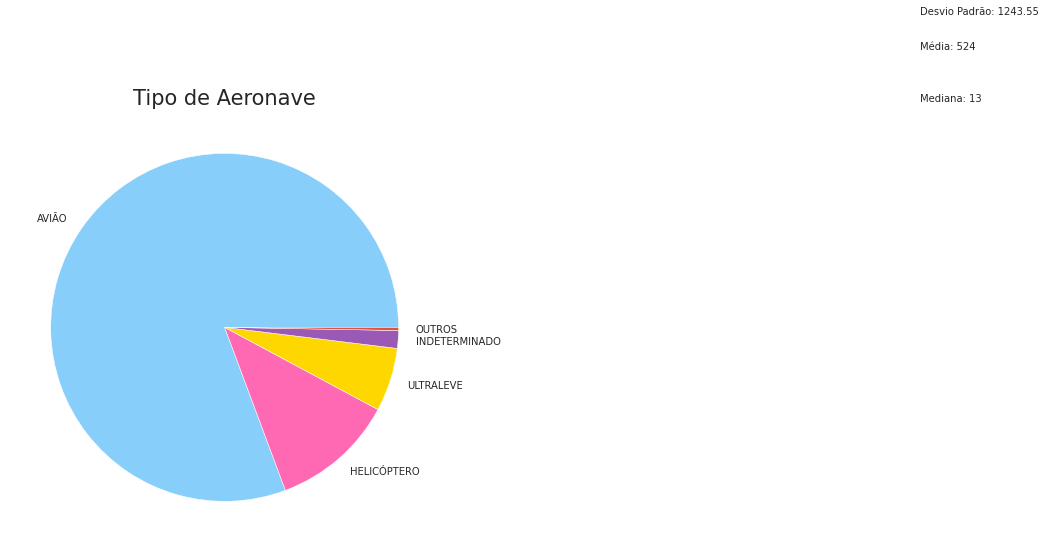

In [221]:
fig = plt.figure(figsize=(8,8))
sns.set_style('ticks')
tipo = dados['aeronave_tipo'].value_counts()
tipo_num = [tipo[0], tipo[1], tipo[2], tipo[3], tipo[4]]
plt.pie(tipo_num, labels=['AVIÃO', 'HELICÓPTERO', 'ULTRALEVE', 'INDETERMINADO', 'OUTROS'], colors=cores_ano)
plt.title('Tipo de Aeronave', fontsize=21)

plt.text(4, 1.6, 'Média: %d'%(static.mean(dados['aeronave_tipo'].value_counts())))
plt.text(4, 1.3, 'Mediana: %d'%(static.median(dados['aeronave_tipo'].value_counts())))
plt.text(4, 1.8, 'Desvio Padrão: %.2f'%(static.pstdev(dados['aeronave_tipo'].value_counts())))

No gráfico acima foram analisados os tipos de aeronaves, mais especificamente os 4 com mais registros e em seguida uma junção de todos os que restaram com menos registros. 

Nota-se que **Avião** possui o **maior número de registros** (80%), seguido do **Helicóptero** com 11%. 

**Ultraleve** com 5% e **Indeterminado** com pouco mais de 1%. 

Outros (menos de 1% de registros): **Planador**, **Anfíbio**, **Trike**, **Dirigível**, **Balão** e **Hidroavião**.

# Principais Ocorrências

In [ ]:
dados['descricao'].value_counts()/dados['descricao'].value_counts().sum()*100

FALHA DO MOTOR EM VOO                                 12.056467
ESTOURO DE PNEU                                       10.797406
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    10.301412
PERDA DE CONTROLE NO SOLO                              8.145746
PERDA DE CONTROLE EM VOO                               6.352537
                                                        ...    
HIPÓXIA                                                0.019077
CAUSADO POR RICOCHETE                                  0.019077
IMC NÃO INTENCIONAL                                    0.019077
PERDA DE SEPARAÇÃO / COLISÃO EM VOO                    0.019077
EXPLOSÃO                                               0.019077
Name: descricao, Length: 75, dtype: float64

In [222]:
descricao = Counter(dados['descricao'])
fase_descricao = sorted(descricao, key = descricao.get, reverse = True)
contador = sorted(list(descricao.values()), reverse = True)

Text(500, 5.9, 'Desvio Padrão: 133.36')

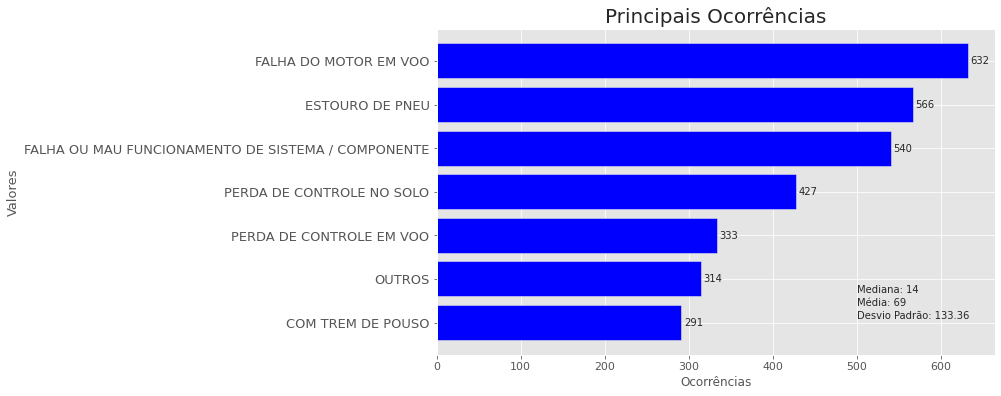

In [231]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10,6))

x = fase_descricao[:7]
y = contador[:7]

ax.barh(x,y, color='blue')

for i, v in enumerate(y):
  ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()

plt.xlabel('Ocorrências')
plt.title('Principais Ocorrências', fontsize=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.ylabel('Valores', fontsize=13)

plt.text(500, 5.6, 'Média: %d'%(static.mean(dados['descricao'].value_counts())))
plt.text(500, 5.3, 'Mediana: %d'%(static.median(dados['descricao'].value_counts())))
plt.text(500, 5.9, 'Desvio Padrão: %.2f'%(static.pstdev(dados['descricao'].value_counts())))

**Análise das 7 principais ocorrências**

Nota-se que a principal ocorrência por a **Falha do Motor em Voô**, com 632 registros. 

Logo atrás, com 566 registros tem o **Estouro de Pneu**. 

Das filtradas (7) a que possui menos ocorrências é a **Com Trem de Pouso** (291 registros). 

# Por Tipo de Motor

In [ ]:
dados['motor_tipo'].value_counts()/dados['motor_tipo'].value_counts().sum()*100

PISTÃO           56.314384
JATO             19.400992
TURBOÉLICE       11.922930
TURBOEIXO         9.557421
INDETERMINADO     2.518123
SEM TRAÇÃO        0.286150
Name: motor_tipo, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(10, 12.9, 'Desvio Padrão: 985.57')

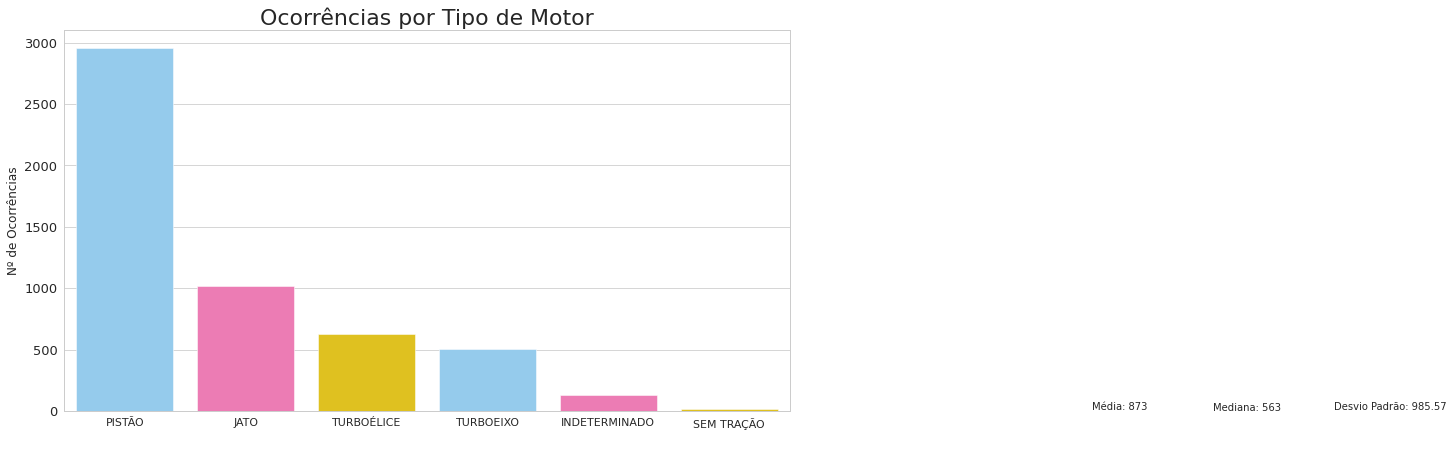

In [237]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(13,7))
sns.countplot('motor_tipo', order = dados['motor_tipo'].value_counts().index, palette= cores_tipo, data=dados)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Ocorrências por Tipo de Motor', fontsize = 22)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.ylabel('Nº de Ocorrências', fontsize=12)

plt.text(8, 8.6, 'Média: %d'%(static.mean(dados['motor_tipo'].value_counts())))
plt.text(9, 5.3, 'Mediana: %d'%(static.median(dados['motor_tipo'].value_counts())))
plt.text(10, 12.9, 'Desvio Padrão: %.2f'%(static.pstdev(dados['motor_tipo'].value_counts())))

Podemos ver que o tipo que motor que mais obteve registros foi o motor de **Pistão**, com números significativos (56% dos registros). 

Os únicos motores **acima da média** são o de **Pistão** e o de **Jato**. 

O motor com **menos** registros foi o **Sem Tração**, com menos de 1% de registros. 

# Ocorrências por Fabricantes

In [ ]:
dados['aeronave_fabricante'].value_counts()/dados['aeronave_fabricante'].value_counts().sum()*100

CESSNA AIRCRAFT                          15.261351
EMBRAER                                  11.236169
NEIVA INDUSTRIA AERONAUTICA              11.121709
PIPER AIRCRAFT                            7.115605
INDETERMINADO                             5.455933
                                           ...    
CLINICA MEDICA PRIETO & ANTUNES LTDA.     0.019077
ECLIPSE AEROSPACE                         0.019077
ROBERT MOHR                               0.019077
MARIO CARLOS CARDOSO                      0.019077
MARCO AURELIO M. DE SOUSA                 0.019077
Name: aeronave_fabricante, Length: 223, dtype: float64

In [238]:
aeronave_fabricante = Counter(dados['aeronave_fabricante'])
fabricante = sorted(aeronave_fabricante, key = aeronave_fabricante.get, reverse = True)
contador = sorted(list(aeronave_fabricante.values()), reverse = True)

Text(500, 7.9, 'Desvio Padrão: 90.27')

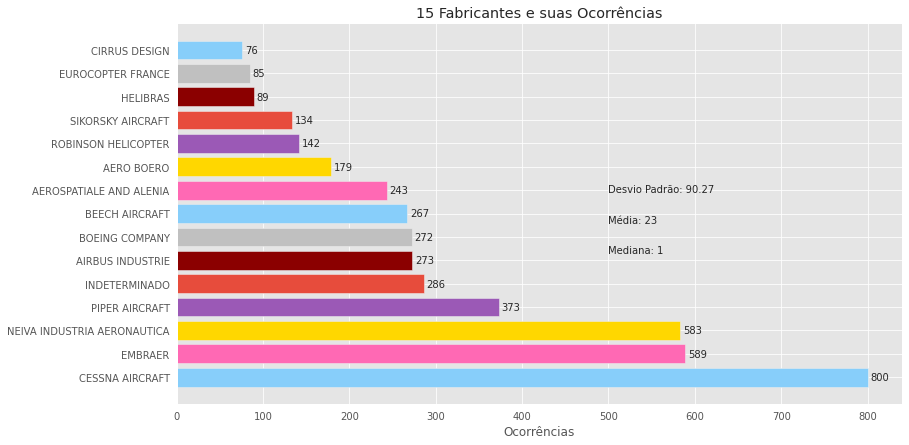

In [240]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(13,7))

x = fabricante[:15]
y = contador[:15]

ax.barh(x, y, color = cores_ano)

for i, v in enumerate(y):
  ax.text(v + 3, i, str(v), va = 'center')


plt.xlabel('Ocorrências')
plt.title('15 Fabricantes e suas Ocorrências')

plt.text(500, 6.6, 'Média: %d'%(static.mean(dados['aeronave_fabricante'].value_counts())))
plt.text(500, 5.3, 'Mediana: %d'%(static.median(dados['aeronave_fabricante'].value_counts())))
plt.text(500, 7.9, 'Desvio Padrão: %.2f'%(static.pstdev(dados['aeronave_fabricante'].value_counts())))

O fabricante com **mais** registros foi o **Cessna Aircraft**, fabricante sediada no Kansas, que produz aviões para vários propósitos, produz pequenos motores, jatos executivos e alguns modelos militares, ela possui **800** registros. 

Atrás dela, com 589 está a **Embraer**, empresa brasileira. 

Das 15 fabricantes filtradas a que **menos** tem registros é a **Cirrus Design**, com 76 registros. 

# Hora de Ocorrência

In [241]:
horario_ocorrencia = Counter(dados['hora'])
hora = sorted(horario_ocorrencia, key = horario_ocorrencia.get, reverse = True)
contador = sorted(list(horario_ocorrencia.values()), reverse = True)

Text(100, 7.9, 'Desvio Padrão: 12.18')

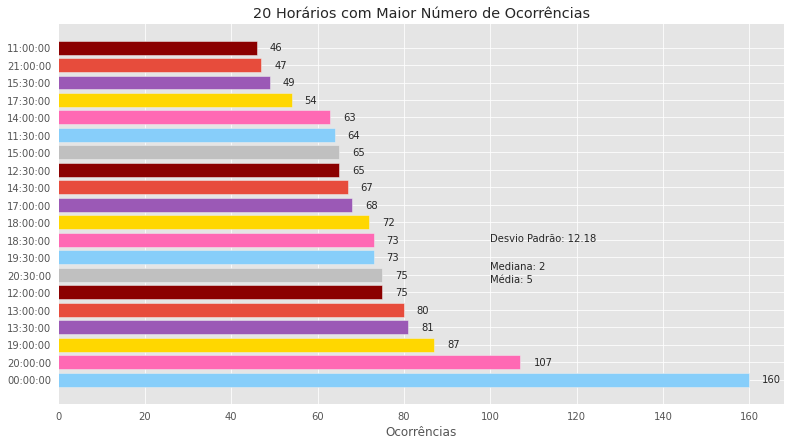

In [246]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(13,7))

x = hora[:20]
y = contador[:20]

ax.barh(x, y, color = cores_ano)

for i, v in enumerate(y):
  ax.text(v + 3, i, str(v), va = 'center')


plt.xlabel('Ocorrências')
plt.title('20 Horários com Maior Número de Ocorrências')

plt.text(100, 5.6, 'Média: %d'%(static.mean(dados['hora'].value_counts())))
plt.text(100, 6.3, 'Mediana: %d'%(static.median(dados['hora'].value_counts())))
plt.text(100, 7.9, 'Desvio Padrão: %.2f'%(static.pstdev(dados['hora'].value_counts())))

O gráfico acima analisa os 20 horários com mais registros de ocorrências. 

Podemos observar que a maioria grande parte dos acidentes ocorrem pela **noite**, os horários com mais registros (3) são todos **após as 19h**. 

O horário com **maior** registro foi o de **00h**, com 160 registros. 

Já o **menor** foi o de **11h**, com 46 registros. 

# Aeronave Liberada

In [60]:
dados['aeronave_liberada'].value_counts()/dados['aeronave_liberada'].value_counts().sum()*100

SIM              51.259061
INDETERMINADO    46.146509
NÃO               2.594430
Name: aeronave_liberada, dtype: float64

In [63]:
liberada = dados['aeronave_liberada'].value_counts()

sim_porc = liberada['SIM']/(liberada['SIM'] + liberada['NÃO'] + liberada['INDETERMINADO'])*100
nao_porc = liberada['NÃO']/(liberada['SIM'] + liberada['NÃO'] + liberada['INDETERMINADO'])*100
indet_porc = liberada['INDETERMINADO']/(liberada['SIM'] + liberada['NÃO'] + liberada['INDETERMINADO'])*100

print('Sim: ({:.2f}%)'.format(sim_porc))
print('Não: ({:.2f}%)'.format(nao_porc))
print('Indeterminado: ({:.2f}%)'.format(indet_porc))

Sim: (51.26%)
Não: (2.59%)
Indeterminado: (46.15%)


Text(2, 2.4, 'Desvio Padrão: 1144.63')

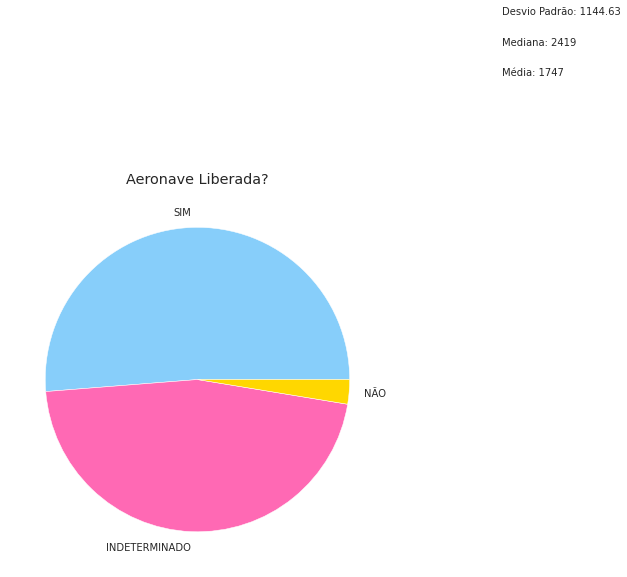

In [250]:
fig = plt.figure(figsize =(7,7))
sns.set_style('ticks')
liberada = dados['aeronave_liberada'].value_counts()
valores = [liberada[0], liberada[1], liberada[2]]
plt.pie(valores, labels=['SIM', 'INDETERMINADO', 'NÃO'], colors=cores_ano)
plt.title('Aeronave Liberada?')

plt.text(2, 2, 'Média: %d'%(static.mean(dados['aeronave_liberada'].value_counts())))
plt.text(2, 2.2, 'Mediana: %d'%(static.median(dados['aeronave_liberada'].value_counts())))
plt.text(2, 2.4, 'Desvio Padrão: %.2f'%(static.pstdev(dados['aeronave_liberada'].value_counts())))

Acima temos a análise para ver se a aeronave estava liberada ou não. 

Como podemos notar, 51% estavam **liberadas**, já 46% tem liberação **indeterminada**. 

Por último, temos aproximadamente 3% de aeronaves **não** liberadas. 

# Saída da Pista

In [9]:
dados['ocorrencia_saida_pista'].value_counts()/dados['ocorrencia_saida_pista'].value_counts().sum()*100

NÃO    91.262877
SIM     8.737123
Name: ocorrencia_saida_pista, dtype: float64

Text(2, 2.4, 'Desvio Padrão: 2163.00')

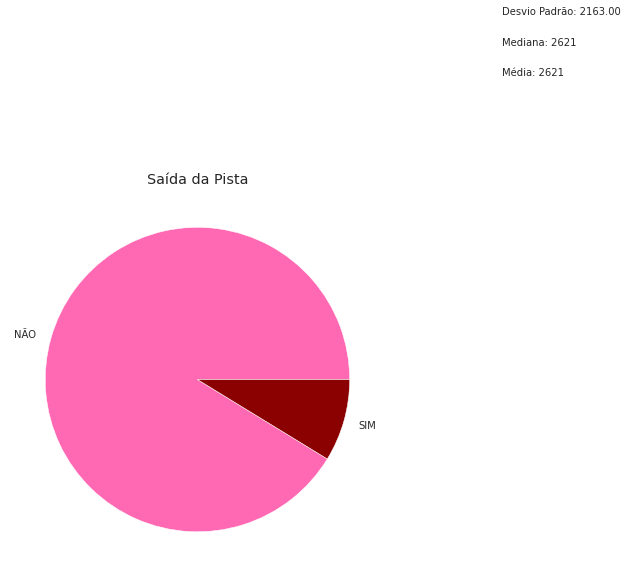

In [14]:
fig = plt.figure(figsize =(7,7))
sns.set_style('ticks')
saida = dados['ocorrencia_saida_pista'].value_counts()
saida_pista = [saida[0], saida[1]]
plt.pie(saida_pista, labels=['NÃO', 'SIM'], colors=cor2)
plt.title('Saída da Pista')


plt.text(2, 2, 'Média: %d'%(static.mean(dados['ocorrencia_saida_pista'].value_counts())))
plt.text(2, 2.2, 'Mediana: %d'%(static.median(dados['ocorrencia_saida_pista'].value_counts())))
plt.text(2, 2.4, 'Desvio Padrão: %.2f'%(static.pstdev(dados['ocorrencia_saida_pista'].value_counts())))

Podemos perceber que a maioria das ocorrências **não** ocasionaram a saída de pista da aeronave (cerca de **91%**). 

O ano que mais obteve ocorrências com saída de pista foi o de **2016**. 

Como no Brasil há um alto nível de segurança aérea, é seguido as recomendações de pouso, meticulosamente, fazendo com que não haja altos registros de acidentes em saída de pista.

# Quantidade de Motores

In [71]:
dados['aeronave_motor_quantidade'].value_counts()/dados['aeronave_motor_quantidade'].value_counts().sum()*100

MONOMOTOR        50.515071
BIMOTOR          45.116368
SEM TRAÇÃO        1.907669
TRIMOTOR          1.316291
INDETERMINADO     1.030141
QUADRIMOTOR       0.114460
Name: aeronave_motor_quantidade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(7, 500, 'Desvio Padrão: 1157.81')

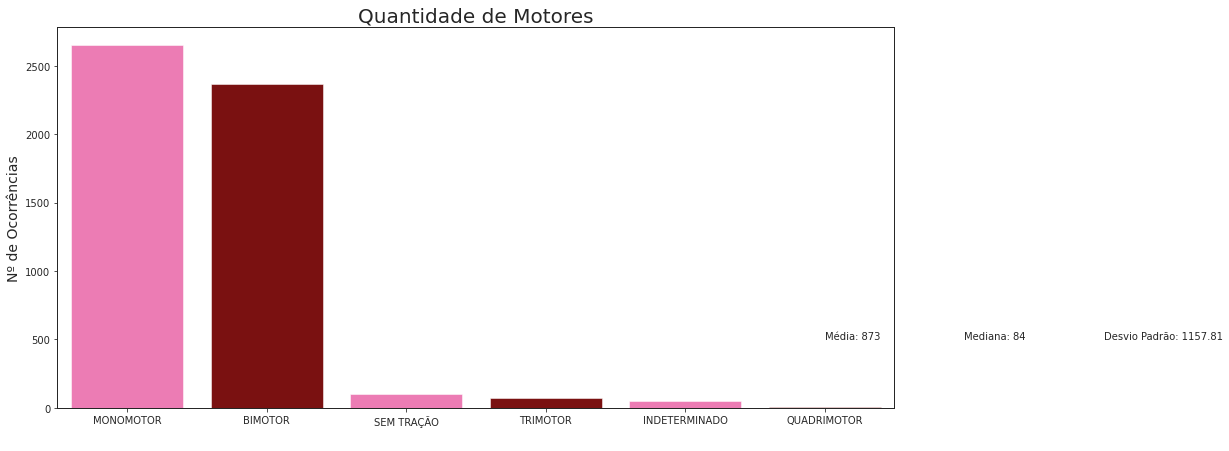

In [262]:
fig = plt.figure(figsize=(15,7))
y = dados['aeronave_motor_quantidade'].count()
sns.countplot('aeronave_motor_quantidade', order=['MONOMOTOR', 'BIMOTOR', 'SEM TRAÇÃO', 'TRIMOTOR', 'INDETERMINADO', 'QUADRIMOTOR'], palette=cor2, data=dados)
plt.xlim(-0.5,5.5)
plt.title('Quantidade de Motores', fontsize=20)
plt.xlabel(' ')
plt.ylabel('Nº de Ocorrências', fontsize=14)


plt.text(5, 500, 'Média: %d'%(static.mean(dados['aeronave_motor_quantidade'].value_counts())))
plt.text(6, 500, 'Mediana: %d'%(static.median(dados['aeronave_motor_quantidade'].value_counts())))
plt.text(7, 500, 'Desvio Padrão: %.2f'%(static.pstdev(dados['aeronave_motor_quantidade'].value_counts())))

Nota-se que os **Monomotores** e **Bimotores** possuem números **elevados** de registros e são os únicos **acima da média** (873). 

A quantidade de motor com **menos** registros foi o **quadrimotor**. 

Sem Tração, Trimotor e Indeterminado possuem baixos registros de ocorrências. 

# Regressão Linear

*Número de Assentos*

In [115]:
# Criando o DataFrame
dtframe = pd.DataFrame()
dtframe['x'] = dados['aeronave_ano_fabricacao']
dtframe['y'] = dados['aeronave_assentos']
x_values = dtframe[['x']]
y_values = dtframe[['y']]
dtframe.head()

,x,y
0,1977,7
1,1997,6
2,1962,6
3,1974,2
4,1974,6


Agora veremos as estatísticas descritivas para entender como este dado está se comportando. 
Vamos plotar algumas estatísticas descritivas do dados, tanto de Y quanto de X.

In [116]:
dtframe.describe()

,x,y
count,5242.000000,5242.000000
mean,1863.320870,27.575353
std,507.051481,54.528085
min,0.000000,0.000000
25%,1978.000000,2.000000
50%,1992.000000,6.000000
75%,2007.000000,10.000000
max,9999.000000,384.000000


Acima temos a média, desvio padrão, mínimo e máximo, a mediana e entre outros. 

In [156]:
aeronave_assentos = Counter(dados['aeronave_assentos'])
assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador = sorted(list(aeronave_assentos.values()), reverse = True)

In [157]:
# Criação do DataFrame
dtframe = pd.DataFrame()
dtframe['y'] = assentos
dtframe['x'] = contador
x_values = dtframe[['x']]
y_values = dtframe[['y']]

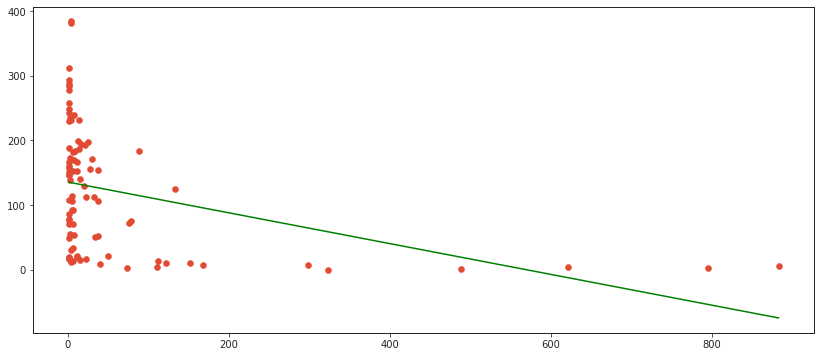

In [158]:
plt.figure(figsize=(14,6))
plt.scatter(dtframe['x'].values, dtframe['y'].values)

fit = np.polyfit(dtframe['x'].values, dtframe['y'].values, 1)
reta = np.poly1d(fit)

plt.plot(dtframe['x'].values, reta(dtframe['x'].values), 'g')
plt.show()

O eixo X representa a quantidade de acidentes ocorridos em território brasileiro e o eixo Y representa a quantidade de assentos das aeronaves. 

Podemos notar que o número de assentos foi diminuindo pois após a grande crescente de ocorrências foram diminuindo o número de assentos das aeronaves. 

Analisando o gráfico podemos ver que quanto menor o número de assentos, maior a quantidade de ocorrências de acidentes. 



# Considerações Finais 

O objetivo deste trabalho é fazer uma análise detalhada e um levantamento estatístico dos acidentes aéreos ocorridos no Brasil, entre os anos de 2010 e 2019, apresentando-os de forma gráfica. 

O conteúdo deste trabalho levou em consideração os dados disponibilizados na pasta "Dados" deste repositório do GitHub. 

Temos como principais ocorrências: ano de ocorrência, regiões, tipos de aeronaves, fabricantes e entre outros.



# Relatório Final

Este trabalho apresentou, de forma gráfica, informações da aviação brasileira entre os anos de 2010 e 2019. O conteúdo do presente documento teve como base os dados coletados e produzidos pelo CENIPA (Centro de Investigação e Preveção de Acidentes Aeronaúticos). 

Tem como principal objetivo compartilhar informações sobre ocorrências de acidentes aeronáuticos. Este projeto compõe análises e estudos objetivando a prevenção de acidentes aeronáuticos. 

Com base na análise dos dados, podemos notar que a maioria dos casos foram de fatores externos e tiveram poucos ou quase nenhum dano pra a aeronave. Temos também a informação de que o maior número de ocorrências foi no ano de 2013 e o menor em 2016. 

Por fim, por meio deste documento podemos observar os fatores que acarretaram os acidentes, os tipos de aeronaves, os danos causados, horários, cidades, regiões e incidentes por ano. 

# Referências Bibliográficas

CENIPA, **FCA 58-1 Ocorrências Aeronaúticas**: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações e Prevenção de Acidentes Aeronaúticos.2016.

Coutinho, Thiago. **O que é a Biblioteca Pandas?**. Blog Voitto, 2021. 

Mulinari, Bruna. **Pandas Python: vantagens e como começar**. Harve, Escola de Inovação, 2021.

Matplotlib. **Matplotlib - Visualization with Python**. Matplotlib, 2022.

W3Schools. **Seaborn**. W3Schools, 2022. 

Mulinari, Bruna. **Numpy Python: O que é, vantagens e tutorial inicial**. Harve, Escola de Inovação, 2020. 

Python Docs. **statistics - Mathematical statistics functions**. Python Docs, 2021.

Gepac, Portal. **Introdução ao SciPy**. GEPAC, 2019.

Writer, PFB Staff. **Python Collections Counter**. Python For Beginners, 2020.

Trezzi, Humberto. **O que as estatísticas sobre acidentes aéreos no Brasil apontam**. GZH Geral, 2019.

HackerRank. **collections.Counter()**. HackerRank, 2022.

Souza, Emanuel G de. **Implementando Regressão Linear Simples em Python**. Medium, 2019.

Valduga, Fernando. **Cessna comemora 15 anos de produção na fábrica em Independence, Kansas**. Cavok, 2011.

Wikipedia. **Embraer**. Wikipedia, 2022.

Shokeen, Monty. **Módulos Matemáticos em Python: Estatística**. EnvatoTuts, 2017.

Ferreira, Mauro. **Coletando dados de Regiões e Estados com Python**. Linkedin, 2021.